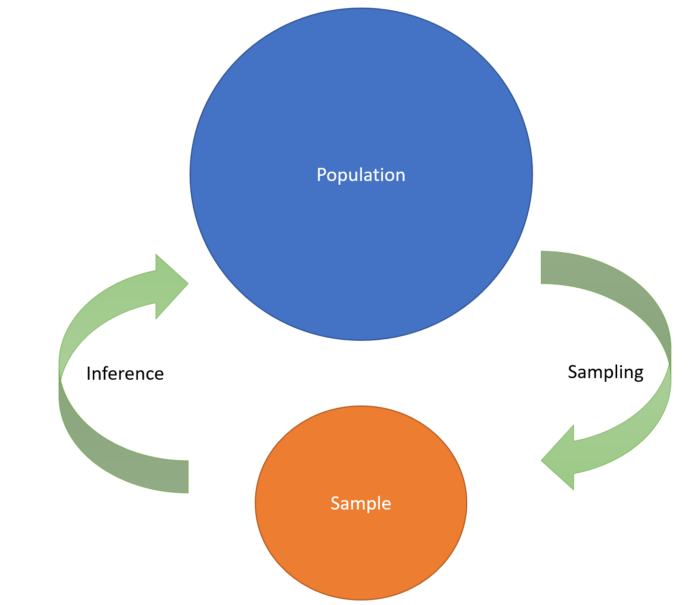

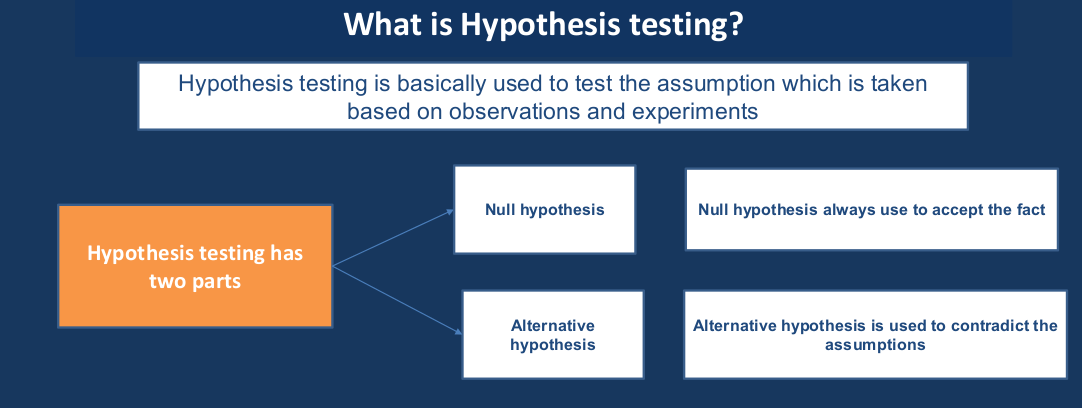

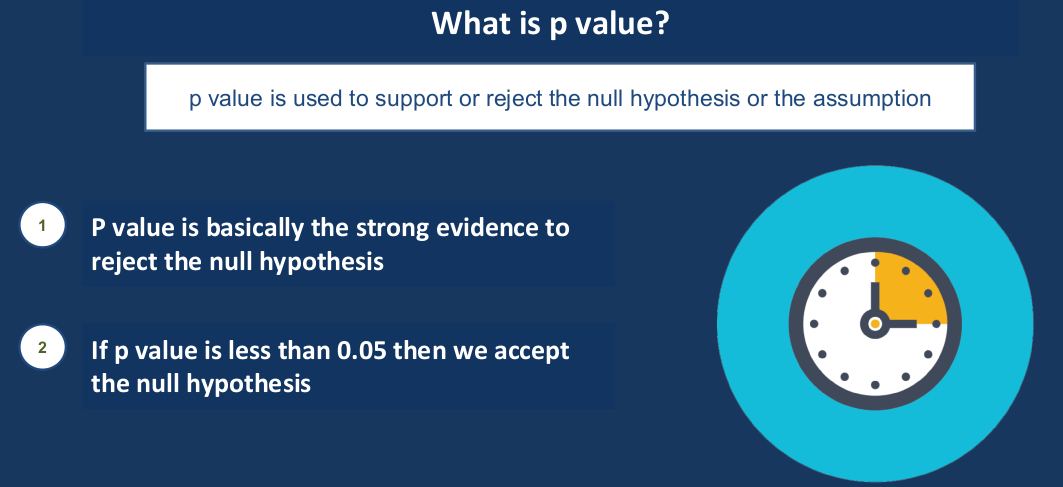

In [1]:
#Hypothesis Testing
#[1] State the Null Hypothesis (Ho)
#[2] Alternate Hypotheis (H1 or Ha) is defined based on Null Hypothesis
# Test Statistic to compute the p-value: Significance Value
# State alpha=0.05 (CI=95%)
# if p-value < 0.05 Null Hypothesis (H0) else Alternate Hypothesis (Ha)

In [2]:
#Import Library
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

In [3]:
data1=20 * randn(1000) + 100

In [4]:
data2=data1+ (10 * randn(1000) + 50)

In [45]:
len(data1)

1000

In [6]:
len(data2)

1000

In [40]:
#Are data1 and data2 related
# My assumption: They are not related- Ho
alpha=0.05 # CI=95 %
if p > alpha:
  print("No correlation-Fail to Reject Ho")
else:
  print("Some correlation-Reject Ho")

No correlation-Fail to Reject Ho


In [41]:
#Test Statistic
corr,p=pearsonr(data1,data2)

In [42]:
corr

-0.036310809687177474

In [43]:
p

0.2513027735692649

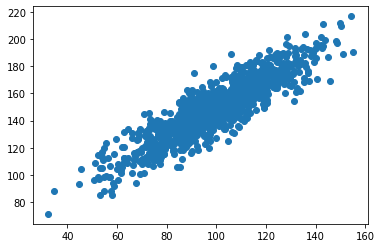

In [11]:
import matplotlib.pyplot as plt
plt.scatter(data1,data2)

In [12]:
# Case-2
data1=10 * randn(1000) + 100
data2=10 * randn(1000) + 50

In [13]:
# 1Sample Test (One Proportion test),t-test, Chi-Square, Correlation Test, Anova Test

In [14]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import KDDCUP IDS Dataset 
url='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
#Create a dataframe
df=pd.read_csv(url)
#To see the dimensions of the dataset
df.shape

(494020, 42)

In [15]:
# The CSV file has no column heads, so add them
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

In [16]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

In [17]:
df.shape

(494020, 42)

In [18]:
#Sample1 and Sample2 (Numerical)- T-Test
sample1=df.sample(frac=0.1,replace=False)
sample2=df.sample(frac=0.1,replace=False)

In [19]:
sample1.shape

(49402, 42)

In [20]:
sample2.shape

(49402, 42)

In [21]:
df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [22]:
sample1[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
265181,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
469087,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119,9,0.0,0.0,1.0,1.0,0.08,0.06,0.0,255,9,0.04,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune.
243128,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
121169,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,230,10,1.0,1.0,0.0,0.0,0.04,0.07,0.0,255,10,0.04,0.08,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
250120,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [23]:
sample2[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
143062,3,tcp,smtp,SF,1894,361,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,52,113,0.56,0.10,0.02,0.02,0.0,0.0,0.0,0.0,normal.
477420,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,284,13,0.0,0.0,1.0,1.0,0.05,0.06,0.0,255,13,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,neptune.
59973,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134,10,1.0,1.0,0.0,0.0,0.07,0.06,0.0,255,10,0.04,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
142823,0,tcp,finger,SF,6,138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,125,12,0.06,0.04,0.01,0.17,0.0,0.0,0.0,0.0,normal.
383220,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,291,22,1.0,1.0,0.0,0.0,0.08,0.05,0.0,255,22,0.09,0.05,0.00,0.00,1.0,1.0,0.0,0.0,neptune.


In [24]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [25]:
popmean=df.duration.mean()

In [26]:
popmean

47.97939961944861

In [27]:
s1mean=sample1.duration.mean()

In [28]:
s1mean

46.073883648435284

In [29]:
s2mean=sample2.duration.mean()

In [30]:
s2mean

51.49224727743816

In [31]:
#State Ho: Same Distribution, Ha=Different Distribution
if p > alpha:
  print('Same Distribution-Fail to Reject Ho')
else:
  print('Different Distribution-Reject Ha')

Different Distribution-Reject Ha


In [32]:
#Test Statistic p-value
from scipy.stats import ttest_ind

In [33]:
stats,p=ttest_ind(sample1['duration'],sample2['duration'])

In [34]:
p

0.24230427066586072

In [35]:
df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [38]:
#One Categorical-One proportion test
#Two Categorical- Chi-Square Test
#One continuous Variable-T test
#Two Numerical variable-Correlation test
#One numerical and One or Two Categorical- ANOVA Test



In [77]:
#Chi-square test on 2 categorical variables

In [36]:
df.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [48]:
df.flag.unique()

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH'], dtype=object)

In [47]:
from scipy.stats import chi2_contingency

In [60]:
crosstab = pd.crosstab( df['protocol_type'],df['flag'])
crosstab

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
protocol_type,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,283602,0
tcp,8,26875,579,11,903,87007,57,24,10,74483,107
udp,0,0,0,0,0,0,0,0,0,20354,0


In [73]:
chi2, p, dof, expected= chi2_contingency(crosstab)

In [75]:
chi2



241293.68081484857

In [76]:
#p value here is :
p

0.0

We can reject the null hypothesis as the p-value is less than 0.05. Thus there is a relationship between protocol_type and flags .
0 indicates a failure to reject the null hypothesis at the 5% significance level

In [79]:
#One numerical and One or Two Categorical- ANOVA Test

In [82]:
#ANOVA Hypotheses

#Null hypotheses: Groups means are equal (no variation in means of groups)
#Alternative hypotheses: At least,  group mean is different from other group

In [113]:

#One numerical and One way ANOVA Test
print("One Way ANOVA test : ")
F, p = f_oneway(sample1['duration'], sample2['duration'])
print("p : ",p)
if p > alpha:
  print('Same Distribution-Fail to Reject Ho')
else:
  print('Different Distribution-Reject Ha')

One Way ANOVA test : 
p :  0.24230427067617893
Same Distribution-Fail to Reject Ho


In [109]:
# Independent T test
print("Independent T test : ")
stats,p = ttest_ind(sample1['duration'],sample2['duration'])
print("p : ",p)

#State Ho: Same Distribution, Ha=Different Distribution
if p > alpha:
  print('Same Distribution-Fail to Reject Ho')
else:
  print('Different Distribution-Reject Ha')

Independent T test : 
p :  0.24230427066586072
Same Distribution-Fail to Reject Ho


In [112]:

# One Sample T test
print("One sample T test : ")
tset, p_val = ttest_1samp(sample1['duration'], sample2['duration'])
print("p : ",p_val.max())

#State Ho: Same Distribution, Ha=Different Distribution
if p_val.max() > alpha:
  print('Same Distribution-Fail to Reject Ho')
else:
  print('Different Distribution-Reject Ha')

One sample T test : 
p :  0.718259985056422
Same Distribution-Fail to Reject Ho



Conclusion :
From the experiment conducted, it can be concluded that the Scipy library in Python has various tools to calculate probabilities, densities, quantiles and random variates of different distributions such as normal, poisson's, exponential, binomial etc. 